In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../data/fucking_final_dataset.csv')
records = records[records.pub_year > 1599]
records = records[records.pub_year < 1700]

## Clean locs

In [3]:
len(records)

56461

In [4]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,Unnamed: 0.1.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,title_auth_slug,canonical_title,canonical_author,slug,canonical_city,canonical_country,full_text_slug
169,169,190,190,190,11508275,viage de la serenissima reyna dona maria ana d...,NaN,"mascarenhas, jeronymo",por d. diaz de la carrera,madrid,1650,NaN,NaN,viage de la serenissima reyna dona maria ana d...,viage de la serenissima reyna dona maria ana d...,"mascarenhas, jeronymo","madrid,spain",madrid,spain,viage de la serenissima reyna dona maria ana d...


In [5]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

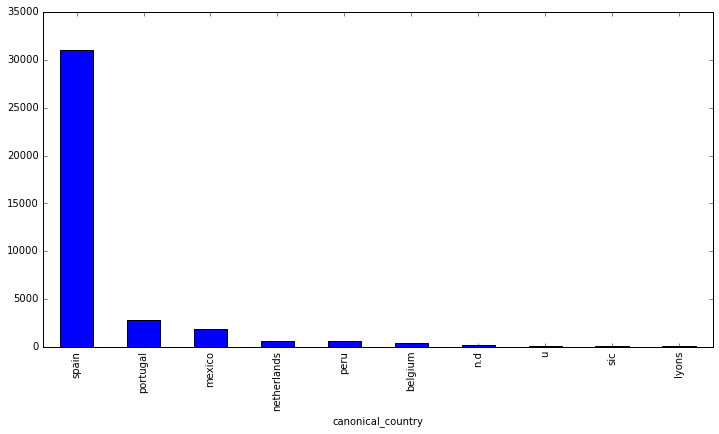

In [6]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")

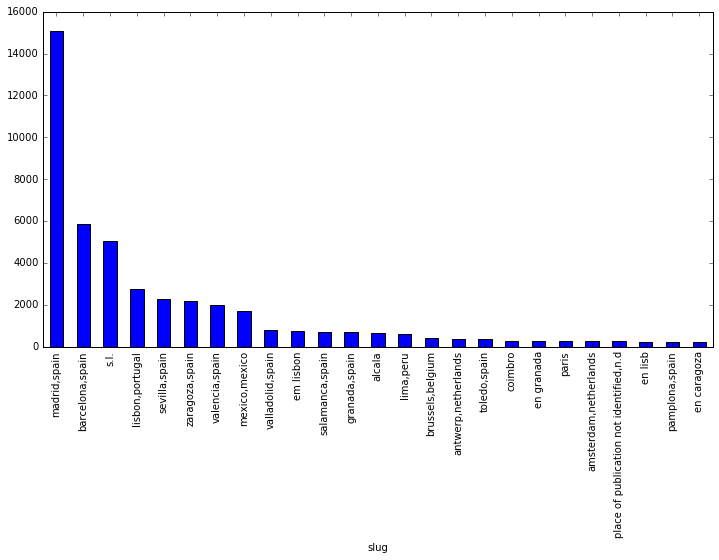

In [7]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")

## Global Publication By Year

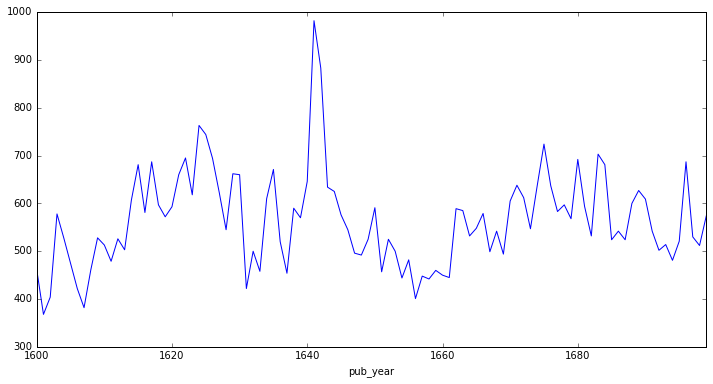

In [8]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [9]:
# records[records.pub_year < 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [10]:
# records[records.pub_year > 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [19]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:12].index

In [20]:
top_producers = records[records.slug.isin(top_slugs)]

In [21]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [28]:
top_producer_df = pd.DataFrame({
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'lisbon,portugal': group_top_producers.ix['lisbon,portugal'],
    'sevilla,spain': group_top_producers.ix['sevilla,spain'],
    'zaragoza,spain': group_top_producers.ix['zaragoza,spain'],
#     'valencia,spain': group_top_producers.ix['valencia,spain'],
#     'mexico,mexico': group_top_producers.ix['mexico,mexico'],
#     'valladolid,spain': group_top_producers.ix['valladolid,spain'],
#     'salamanca,spain': group_top_producers.ix['salamanca,spain'],
#     'granada,spain': group_top_producers.ix['granada,spain'],    
})
top_producer_df = top_producer_df.fillna(0)

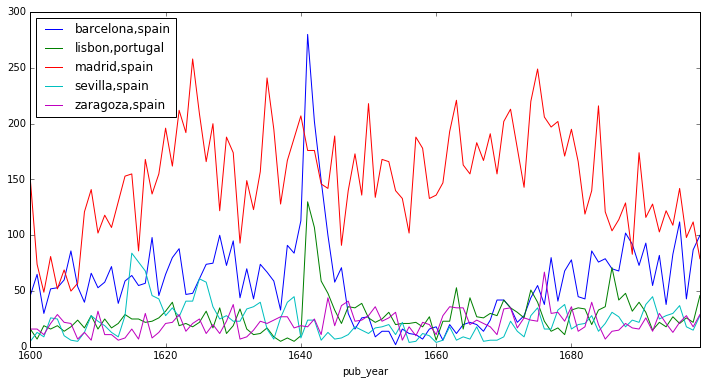

In [29]:
top_producer_df.plot()

In [25]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']

In [26]:
top_producer_df_percent = pd.DataFrame({
    'madrid,spain': top_producer_df['madrid,spain'].divide(counted_by_year.values),
    'barcelona,spain': top_producer_df['barcelona,spain'].divide(counted_by_year.values),
    'lisbon,portugal': top_producer_df['lisbon,portugal'].divide(counted_by_year.values),
    'sevilla,spain': top_producer_df['sevilla,spain'].divide(counted_by_year.values),
    'zaragoza,spain': top_producer_df['zaragoza,spain'].divide(counted_by_year.values),
#     'valencia,spain': top_producer_df['valencia,spain'].divide(counted_by_year.values),
#     'mexico,mexico': top_producer_df['mexico,mexico'].divide(counted_by_year.values),
#     'valladolid,spain': top_producer_df['valladolid,spain'].divide(counted_by_year.values),
#     'salamanca,spain': top_producer_df['salamanca,spain'].divide(counted_by_year.values),
#     'granada,spain': top_producer_df['granada,spain'].divide(counted_by_year.values),    
})

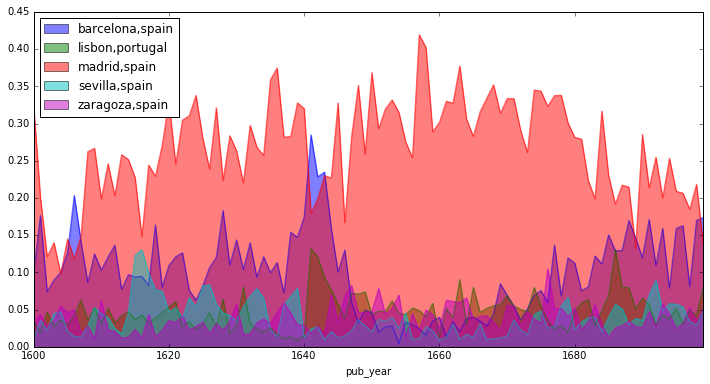

In [27]:
top_producer_df_percent.plot.area(stacked=False)

In [41]:
america = records[records.slug.isin(['lima,peru', 'mexico,mexico'])].\
sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

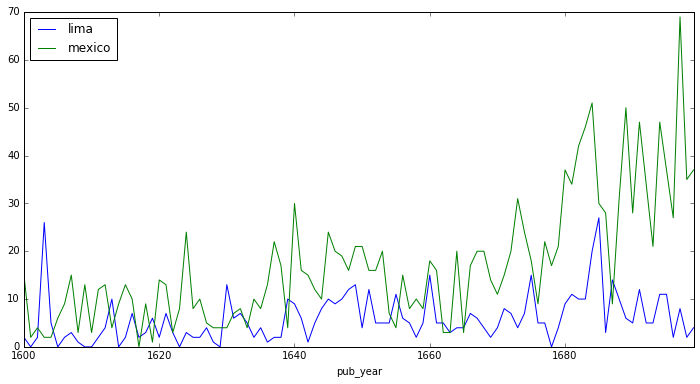

In [45]:
pd.DataFrame({'lima': america.ix['lima,peru'], 'mexico': america.ix['mexico,mexico']}).fillna(0).plot()